* ***Problem Statement;*** 

Challenge->Please predict column "y". Train your models on train.csv and predict on test.csv

Note; Submissions are evaluated on Root-Mean-Squared-Error(RMSE) between the predicted value and the observed value.

***Notebook Descriptions;***
1. Required things & Import Necessary Librarries.
1. Datasets Reading & Datasets Understanding.
1. Data Visualizations, Feature Engineering, EDA & Statistical Analysis.
1. Datasets Pre-Processing & Split the Dataset for Machine Learning Models Training.

1. Machine Learning Model Performance Evaulation And Predictions on the Test Dataset.

                          *  Xgboost Regression Model with Hyperparameters Tuning.
              
                          *  LGBM Regression Model with Hyperparameters Tuning.
                          
                          *  Stacking averaged Models with Hyperparameters Tuning.
                          
                          *  Ensemble Stacking averaged Models with Hyperparameters Tuning.
              
              
6. Final Model Selection & Predictions.

7. Predicted ouput & Submission File(Submission.csv).

* **Required things & Import Necessary Librarries.**

In [1]:
import os

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [2]:
!nvidia-smi

Fri Jul 14 05:38:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os.path
import random
import time
import glob
from pathlib import Path

In [4]:
#Basic Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
from subprocess import check_output

In [6]:
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

In [7]:
# Stats And Ml Models
import statsmodels.api as sm
import statsmodels.formula.api as smf
import gc
import re
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as prep
import sklearn.ensemble as ens

In [8]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [9]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import lightgbm as lgb

In [10]:
#ACCURACY CONTROL
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

In [11]:
#Deep Learning Model Packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras import models
from keras.utils import plot_model
import keras
from keras.models import Model
from keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras import backend as K

* **Datasets Reading & Datasets Understanding.**

In [12]:
print(check_output(["ls", "../input/sample-datasets/Senior ML Engineer-Task"]).decode("utf8"))

sample_submission.csv
test.csv
train.csv



In [13]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('../input/sample-datasets/Senior ML Engineer-Task/train.csv')

train.head(10)

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,A 0,B0,C2,D1,100,E1,F2,237000
1,1,A1,B0,C11,D4,100,E4,F2,86193
2,2,A0,B0,C18,D0,0,E0,F2,169200
3,3,A2,B0,C11,D1,100,E1,F2,58000
4,4,A0,B0,C67,D1,0,E1,F2,235000
5,5,A0,B0,C11,D1,100,E1,F2,170000
6,6,AO,B0,C11,D1,100,E1,F0,183600
7,7,A0,B0,C4,D1,0,E1,F2,100000
8,8,A0,B0,C2,D1,100,E1,F2,175000
9,9,A0,B0,C2,D1,100,E1,F2,136000


In [14]:
test = pd.read_csv('../input/sample-datasets/Senior ML Engineer-Task/test.csv')

test.head(10)

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,2628,A0,B0,C11,D1,100,E1,F2
1,2629,A0,B0,C11,D1,0,E1,F2
2,2630,A0,B0,C11,D1,100,E1,F2
3,2631,A0,B0,C26,D1,100,E1,F0
4,2632,A0,B0,C11,D1,100,E1,NaN
5,2633,A 0,B0,C2,D1,100,E1,F2
6,2634,A0,B0,C11,D1,0,E1,F2
7,2635,A1,NaN,C2,D12,50,E11,F2
8,2636,A0,B0,C11,D1,0,E1,F0
9,2637,A0,B0,C9,D1,0,E1,F2


In [15]:
#check the numbers of samples and features
print("The train data size before dropping UID feature is : {} ".format(train.shape))

print("The test data size before dropping UID feature is : {} ".format(test.shape))

The train data size before dropping UID feature is : (2628, 9) 
The test data size before dropping UID feature is : (1127, 8) 


In [16]:
#Save the 'UID' column
train_UID = train['UID']

test_UID = test['UID']

In [17]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("UID", axis = 1, inplace = True)
test.drop("UID", axis = 1, inplace = True)

In [18]:
#check again the data size after dropping the 'UID' variable
print("\nThe train data size after dropping UID feature is : {} ".format(train.shape)) 

print("The test data size after dropping UID feature is : {} ".format(test.shape))


The train data size after dropping UID feature is : (2628, 8) 
The test data size after dropping UID feature is : (1127, 7) 


**Target Variable;** 
Log-transformation of the target variable

In [19]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["y"] = np.log1p(train["y"])

* **Data Visualizations, Feature Engineering, EDA & Statistical Analysis.**

<Axes: ylabel='col_1'>

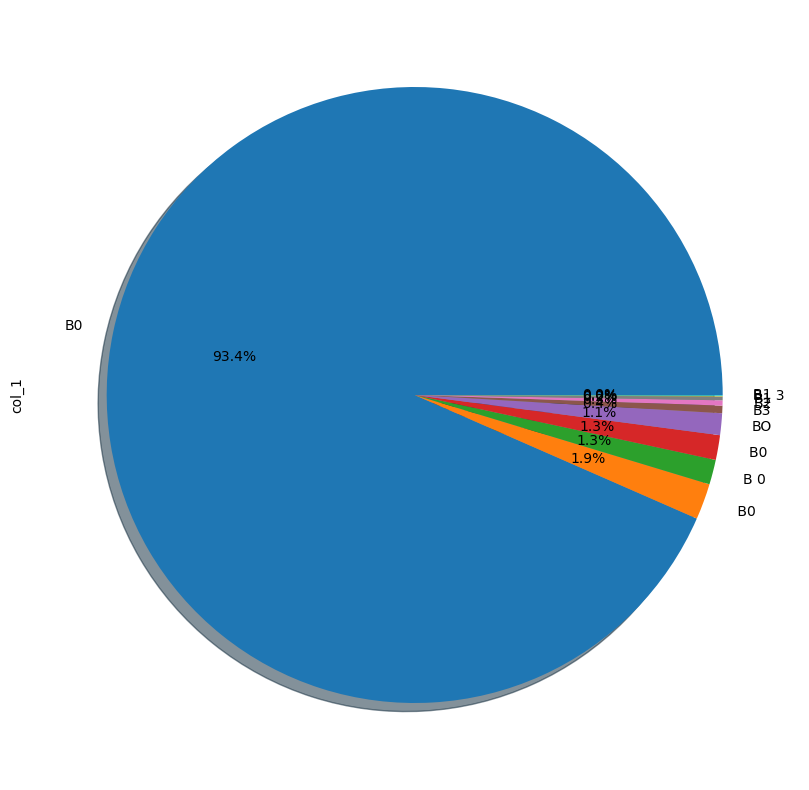

In [20]:
# Show the col_1 using in Dataset

plt.figure(figsize=(10,10))


train['col_1'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

<Axes: ylabel='col_2'>

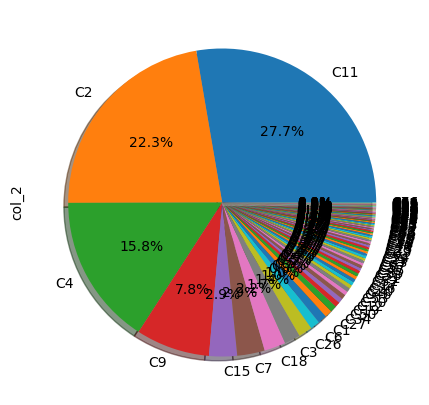

In [21]:
# Show the col_2 using in Dataset

plt.figure(figsize=(8,5))


train['col_2'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

<Axes: ylabel='col_3'>

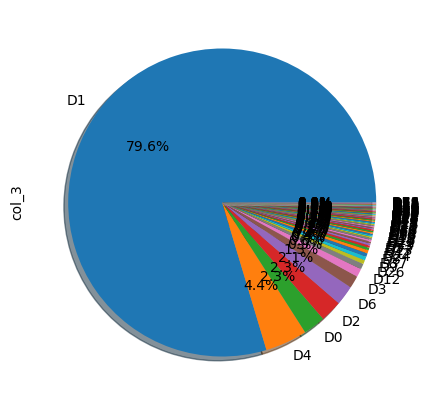

In [22]:
# Show the percentage col_3 in Dataset

plt.figure(figsize=(8,5))

train['col_3'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

<Axes: ylabel='col_4'>

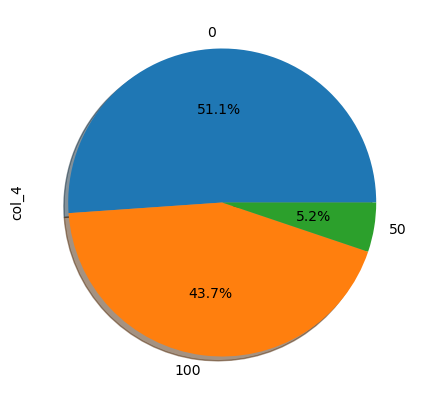

In [23]:
# Show the percentage col_4 in Dataset

plt.figure(figsize=(8,5))

train['col_4'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

<Axes: ylabel='col_5'>

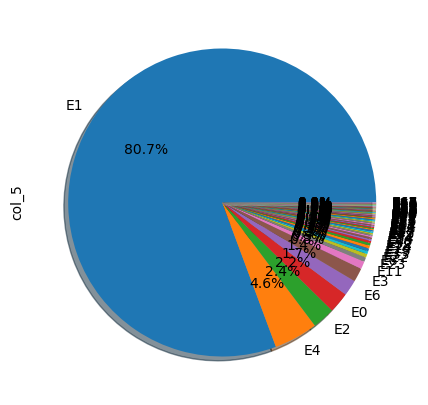

In [24]:
# Show the percentage col_5 in Dataset

plt.figure(figsize=(9,5))

train['col_5'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

<Axes: ylabel='col_6'>

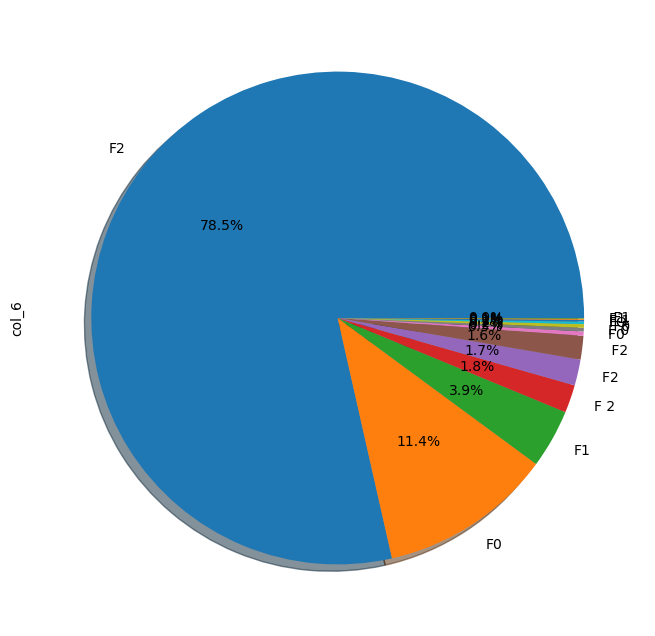

In [25]:
# Show the percentage col_6 in Dataset

plt.figure(figsize=(9,8))

train['col_6'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

Feature Engineering;

In [26]:
ntrain = train.shape[0]

ntest = test.shape[0]

In [27]:
y_train = train.y.values

all_data = pd.concat((train, test)).reset_index(drop=True)

all_data.drop(['y'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (3755, 7)


In [28]:
#Missing Data cheaking

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
col_0,5.486
col_6,4.261
col_1,3.196


Text(0.5, 1.0, 'Percent missing data by feature')

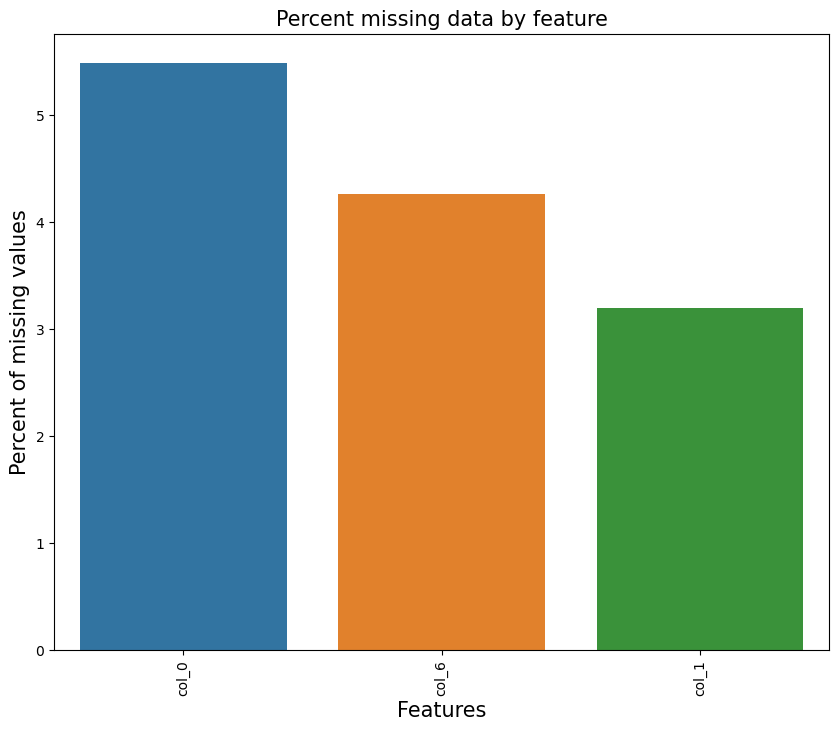

In [29]:
#Plotting the Missing Data Ratio
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='vertical')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<Axes: >

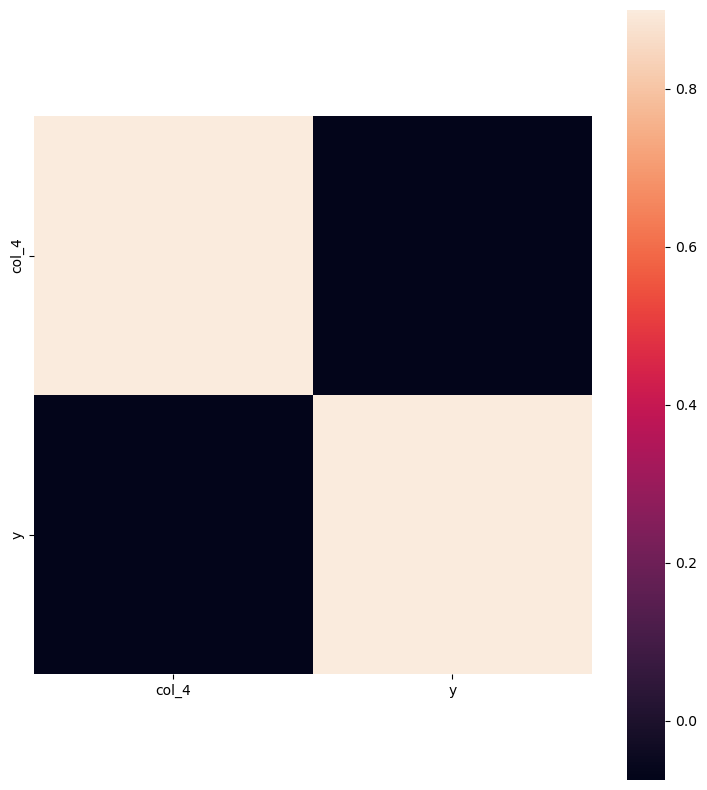

In [30]:
#Data Correlation
#Correlation map to see how features are correlated with y

corrmat = train.corr()
plt.subplots(figsize=(9,10))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [31]:
#Missing Value Treatment ; Imputing missing values
for col in ('col_0', 'col_1', 'col_6'):
    all_data[col] = all_data[col].fillna('None')

->Is there any remaining missing value ?

In [32]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


It remains no missing value

->Label Encoding some categorical variables that may contain information in their ordering set

In [33]:
cols = ('col_0','col_1','col_2','col_3','col_5','col_6')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [34]:
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (3755, 7)


 Statistical Analysis;

In [35]:
#Skewed features of the dataset
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
col_1,3.538
col_5,2.903
col_3,2.865
col_2,1.377
col_4,0.149
col_0,-0.070
col_6,-1.775


Box Cox Transformation of (highly) skewed features;
We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x
 .

Note that setting  λ=0
  is equivalent to log1p used above for the target variable.

In [36]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 7 skewed numerical features to Box Cox transform


> Getting dummy categorical features

In [37]:
all_data = pd.get_dummies(all_data)

print(all_data.shape)

(3755, 7)


* **Datasets Pre-Processing & Split the Dataset for Machine Learning Models Training.**

In [38]:
#Getting the new train and test sets.
train = all_data[:ntrain]

test = all_data[ntrain:]

Define a cross validation strategy;

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [39]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=1234).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

* **Machine Learning Model Performance Evaulation And Predictions on the Test Dataset.**

1. Xgboost Regression Model with Hyperparameters Tuning.

In [40]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=1000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =142, nthread = -1)

In [41]:
#Xgboost Model score
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[05:38:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[05:38:23] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[05:38:24] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[05:38:25] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[05:38:26] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Xgboost score: 0.4043 (0.0189)



2. LGBM Regression Model with Hyperparameters Tuning.

In [42]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=1500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [43]:
#LGBM model score
score = rmsle_cv(model_lgb)

print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [

3. **Stacking averaged Models with Hyperparameters Tuning**.

In [44]:
#LASSO Regression

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [45]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.5014 (0.0382)



In [46]:
#Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005,
                                                l1_ratio=.9, random_state=123))

In [47]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.5014 (0.0382)



In [48]:
#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2,
                  coef0=2.5)

In [49]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.4938 (0.0337)



In [50]:
#Gradient Boosting Regression

GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =142)

In [51]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.4059 (0.0184)



->Averaged base models class

In [52]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [53]:
#Averaged base models score
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.4535 (0.0324)



->Stacking averaged Models Class withlasso as meta-model.

In [54]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=0)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [55]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)


In [56]:
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.4026 (0.0228)


4.  **Ensemble Stacking averaged Models with Hyperparameters Tuning.**

Ensembling StackedRegressor, XGBoost and LightGBM; We add XGBoost and LightGBM to the StackedRegressor defined previously

In [57]:
#We first define a rmsle evaluation function

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

6. **Final Model Selection & Predictions.**

In [58]:
#StackedRegressor Score

stacked_averaged_models.fit(train.values, y_train)

stacked_train_pred = stacked_averaged_models.predict(train.values)

stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

print(rmsle(y_train, stacked_train_pred))

0.34220818527738955


In [59]:
#Xgboost Model score

model_xgb.fit(train, y_train)

xgb_train_pred = model_xgb.predict(train)

xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[05:41:33] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.29335667538551036


In [60]:
#LGBM Model Score
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.339998805629403


In [61]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.3309252143041386


Ensemble Stacking Model prediction;

In [62]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

7. **Predicted ouput & Submission**

In [63]:
sub = pd.DataFrame()
sub['UID'] = test_UID
sub['y'] = ensemble
sub.to_csv('Submission.csv',index=False)